# NumPy Tensors, Slicing, and Images

Here's a more detailed example of how to interpret images as NumPy tensors.


# Tensors

(D = ndim)

![Tensors](https://i.stack.imgur.com/Lv1qU.jpg)

(source: https://stackoverflow.com/questions/37849322/how-to-understand-the-term-tensor-in-tensorflow)

# 2D Color Image = 3D Tensor

![image as tensor](https://image.slidesharecdn.com/tensordecomposition-170301235239/95/a-brief-survey-of-tensors-5-638.jpg)

(source: https://www.slideshare.net/BertonEarnshaw/a-brief-survey-of-tensors)

# Images and Videos: 2D, 3D, 4D, 5D

|Image type|Coordinates|
|--|--|
|2D grayscale image|(row, col)|
|2D color image (eg. RGB)|(row, col, channel)|
|3D grayscale image|(plane, row, col)|
|3D color image|(plane, row, col, channel)|


|Video type|Coordinates|
|--|--|
|2D color video|(time, row, col, ch)|
|3D multichannel video|(time, plane, row, col, ch)|

(source: http://scikit-image.org/docs/dev/user_guide/numpy_images.html)

# A simple 3D tensor

Before diving into images, let's start with a simple 3-D tensor.

In [169]:
import numpy as np

t = np.array([[
               [1, -1, 11, -11],
               [2, -2, 22, -22]
              ],
              
              [
               [3, -3, 33, -33],
               [4, -4, 44, -44]
              ],
              
              [
               [5, -5, 55, -55],
               [6, -6, 66, -66]
              ]])
t

array([[[  1,  -1,  11, -11],
        [  2,  -2,  22, -22]],

       [[  3,  -3,  33, -33],
        [  4,  -4,  44, -44]],

       [[  5,  -5,  55, -55],
        [  6,  -6,  66, -66]]])

In [157]:
t.ndim # how many dimensions

3

In [158]:
t.shape # what the dimensions are

(3, 2, 4)

### Tensor Lego

Here's a Lego representation of our tensor.

- Each 8-peg Lego brick represents one element.
- There are 3 major blocks
- Each major block contains 2 levels, each level has 4 elements.
- The flat gray piece will be our "slicer"

![setup tensor](assets/numpy/setup_tensor.jpg)

### Terminology and Rules

- By `array`, we refer to NumPy arrays (`np.array`), which can be multi-dimensional.

- Given an array of N dimensions, a slice always returns an array of N-1 dimensions.

### First dimension: Slicing

The first dimension views our tensor this way:

```

t = np.array([
               first_level_array0,  # [[  1,  -1,  11, -11],
                                    #  [  2,  -2,  22, -22]]  <-- note the double square brackets
                                                                  surrounding each chunk [[ ]]
                            
               first_level_array1,  # [[  3,  -3,  33, -33],
                                    #  [  4,  -4,  44, -44]]
                            
               first_level_array2   # [[  5,  -5,  55, -55],
                                    #  [  6,  -6,  66, -66]]
             ])

```

Therefore, a slice along the first dimension will cut in between the chunks:

![slice_dim0](assets/numpy/slice_dim0.jpg)

Slice 0 along the first dimension returns the first big "chunk".

In [164]:
t[0, :, :]

array([[  1,  -1,  11, -11],
       [  2,  -2,  22, -22]])

Slice 1 along the first dimension returns the next big "chunk".

In [165]:
t[1, :, :]

array([[  3,  -3,  33, -33],
       [  4,  -4,  44, -44]])

### Second dimension

The second dimension views our tensor this way:

```
t = np.array([[
               second_level_array0,  # [  1,  -1,  11, -11],
               second_level_array1   # [  2,  -2,  22, -22]   <-- note the single square brackets
                                                                  surrounding each second level array [ ]
              ],
              
              [
               second_level_array0,  # [  3,  -3,  33, -33],
               second_level_array1   # [  4,  -4,  44, -44]
              ],
              
              [
               second_level_array0,  # [  5,  -5,  55, -55],
               second_level_array1   # [  6,  -6,  66, -66]
              ]])
```

Because this is a **slice**, each second-level array is actually composed of *3* vectors:

```
second_level_array[0]: [[  1,  -1,  11, -11], [  3,  -3,  33, -33], [  5,  -5,  55, -55]]

second_level_array[1]: [[  2,  -2,  22, -22], [  4,  -4,  44, -44], [  6,  -6,  66, -66]]

```

A slice along the second dimension will "slice the cake" horizontally:

![slice_dim1](assets/numpy/slice_dim1.jpg)

Slice 0 along the 2nd dimension:

In [173]:
t[:, 0, :]

array([[  1,  -1,  11, -11],
       [  3,  -3,  33, -33],
       [  5,  -5,  55, -55]])

Slice 1 along the 2nd dimension:

In [174]:
t[:, 1, :]

array([[  2,  -2,  22, -22],
       [  4,  -4,  44, -44],
       [  6,  -6,  66, -66]])

### Third dimension

The third dimension is the hardest to visualize, because it's actually looking at each element in the deepest nested array.

```
t = np.array([[
               [element0, element1, element2, element3],  # [  1,  -1,  11, -11],
               [element0, element1, element2, element3]   # [  2,  -2,  22, -22]
              ],
              
              [
               [element0, element1, element2, element3],  # [  3,  -3,  33, -33],
               [element0, element1, element2, element3]   # [  4,  -4,  44, -44]
              ],
              
              [
               [element0, element1, element2, element3],  # [  5,  -5,  55, -55],
               [element0, element1, element2, element3]   # [  6,  -6,  66, -66]
              ]])
```

In other words:
- the 0th slice on the third dimension creates an array that "collects" all the `element0`s
- the 1st slice "collects" all the `element1`s,
- and so on

Something like this:
```
third_dimension_slice[0]: [1, 2], [3, 4]  [5, 6]

third_dimension_slice[1]: [-1, -2], [-3, -4], [-5, -6]

```

Here's slicing looks like for the 3rd dimension, for the first slice:

![slice_dim2](assets/numpy/slice_dim2.jpg)

In [155]:
t[:, :, 0]

array([[1, 2],
       [3, 4],
       [5, 6]])

In [170]:
t[:, :, 1]

array([[-1, -2],
       [-3, -4],
       [-5, -6]])

In [171]:
t[:, :, 2]

array([[11, 22],
       [33, 44],
       [55, 66]])

In [172]:
t[:, :, 3]

array([[-11, -22],
       [-33, -44],
       [-55, -66]])

# Slicing a 2D image

First, we'll download a color image from the web.

In [85]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

url = 'https://edoras.sdsu.edu/doc/matlab/toolbox/images/colorcube.jpg'

# download the image
image = Image.open(requests.get(url, stream=True).raw)

Next, we'll wrap the image in a numpy.array, which converts it to a tensor.

We'll get its shape.

In [86]:
tensor = np.array(image)

tensor.shape

(236, 349, 3)

Let's also check the number of dimensions

In [87]:
tensor.ndim # number of dimensions

3

Finally, plot the image

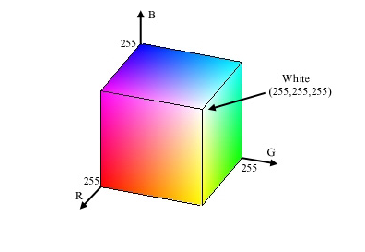

In [88]:
plt.imshow(image)
plt.axis('off')
plt.show()

Let's get the first 10 rows

In [107]:
tensor[:10, :, :].shape

(10, 349, 3)

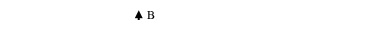

In [113]:
plt.imshow(tensor[:10, :, :])
plt.axis('off')
plt.show()

Let's get the first 100 columns

In [114]:
tensor[:, :100, :].shape

(236, 100, 3)

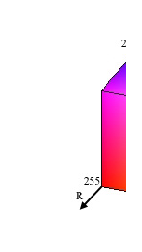

In [115]:
plt.imshow(tensor[:, :100, :])
plt.axis('off')
plt.show()

Let's get the middle 10 rows. 

That's between `(num_rows / 2) - 5` and `(num_rows / 2) + 5` rows

In [122]:
num_rows = tensor.shape[0] # recall shape = (row, column, channel)
num_rows

236

In [123]:
# // means divide and get the integer value, for example: 5//2 = 2

middle_ten_rows = tensor[(num_rows//2 - 5):(num_rows//2 + 5):1, :, :]

middle_ten_rows.shape

(10, 349, 3)

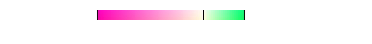

In [124]:
plt.imshow(middle_ten_rows)
plt.axis('off')
plt.show()

Let's get the middle 10 columns.

That's between (num_cols / 2) - 5 and (num_cols / 2) + 5 rows

In [125]:
num_cols = tensor.shape[1]
num_cols

349

In [126]:
middle_ten_cols = tensor[:, (num_cols//2 - 5):(num_cols//2 + 5):1, :]

middle_ten_cols.shape

(236, 10, 3)

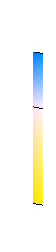

In [127]:
plt.imshow(middle_ten_cols)
plt.axis('off')
plt.show()

# Slicing to get per-channel data

This image has 3 colour channels: `red, green, blue`. This is known as the `RGB colour space`, and is the most commonly used.

An alternative colour space is `blue, green, red` on [libraries such as OpenCV](https://stackoverflow.com/questions/367449/bgr-color-space). There are converters available to convert between RGB to BGR, and other colour spaces.

Let's see how we can get the first channel (red). 

Here's the syntax to get a slice

```
np.array[slice1, slice2, slice3, ...]
```

So for our 3-D tensor, we use `:` to denote the slice for all rows and all columns, and `0` as the index of the first channel.

In [89]:
# all_rows, all_columns, red_channel

tensor[:, :, 0].shape

(236, 349)

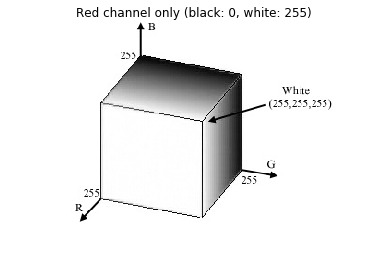

In [90]:
# use grayscale colormap. Otherwise default is 'viridis' (see matplotlib.rcParams)
plt.imshow(tensor[:, :, 0], cmap='gray') 
plt.axis('off')
plt.title('Red channel only (black: 0, white: 255)')
plt.show()

In [91]:
# all_rows, all_columns, green_channel

tensor[:, :, 1].shape

(236, 349)

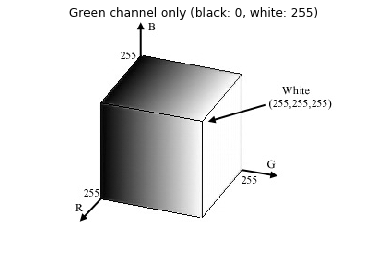

In [92]:
plt.imshow(tensor[:, :, 1], cmap='gray')
plt.axis('off')
plt.title('Green channel only (black: 0, white: 255)')
plt.show()

In [93]:
# all_rows, all_columns, blue_channel

tensor[:, :, 2].shape

(236, 349)

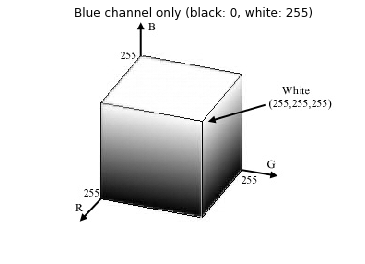

In [94]:
plt.imshow(tensor[:, :, 2], cmap='gray')
plt.axis('off')
plt.title('Blue channel only (black: 0, white: 255)')
plt.show()

# Channel-first ordering

Our example image is using `channels-last` dimension ordering.

[Some platforms](https://keras.io/backend/) prefer `channels-first` dimension ordering, where the shape is:

```
(channels, rows, columns)
```

Let's see how we can convert an image from `channels-last` to `channels-first` ordering.

Note that MatplotLib will only accept images that are channels-last ordering.  It will fail to plot an image with channels-first ordering (you'll have to convert it back).

In [95]:
tensor.shape

(236, 349, 3)

In [96]:
np.moveaxis?

In [97]:
# np.moveaxis(a, source, destination)

# move the last axis (-1) to become the first axis
np.moveaxis(tensor, -1, 0).shape

(3, 236, 349)

# Gray scale images

Gray scale images (or black and white images) have only 1 channel. So, they are 2-D tensors.

However, when you download them from the internet, they have 3 channels.

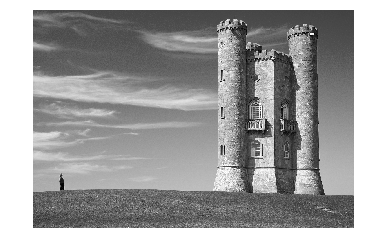

In [98]:
url = 'https://upload.wikimedia.org/wikipedia/commons/f/f2/Broadway_tower_grayscale.jpg'

# download the image
image_gray = Image.open(requests.get(url, stream=True).raw)

# plot the image
plt.imshow(image_gray)
plt.axis('off')
plt.show()

The shape will show 3 channels.

In [99]:
np.array(image_gray).shape

(968, 1428, 3)

The values of the 3 channels are all the same.

In [100]:
gray = np.array(image_gray)

np.testing.assert_array_equal(gray[:, :, 0], gray[:, :, 1]) # no assert means they are equal
np.testing.assert_array_equal(gray[:, :, 0], gray[:, :, 2]) # no assert means they are equal
np.testing.assert_array_equal(gray[:, :, 1], gray[:, :, 2]) # no assert means they are equal

You can pick any one of them without loss of data.

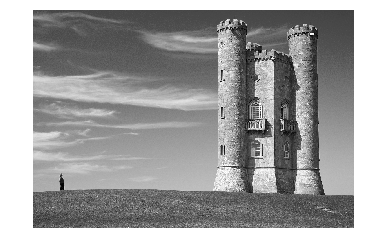

In [74]:
plt.imshow(gray[:, :, 0], cmap='gray')
plt.axis('off')
plt.show()

# More fun: 3D images

https://terbium.io/2017/12/matplotlib-3d/